In [2]:
import numpy as np
import pandas as pd
import Mongo_Connector as mongo
import tlsh
from icecream import ic
import matplotlib.pyplot as plt
import ssdeep
import warnings
from concurrent.futures import ThreadPoolExecutor
from itertools import combinations
import concurrent.futures
warnings.filterwarnings('ignore')
db = mongo.init("portainer", port=32768)
df = pd.DataFrame(list(db["malware"].find({})))
mdf = pd.DataFrame(list(db["mnm"].find({})))

Text(0.5, 1.0, 'Distribution of families')

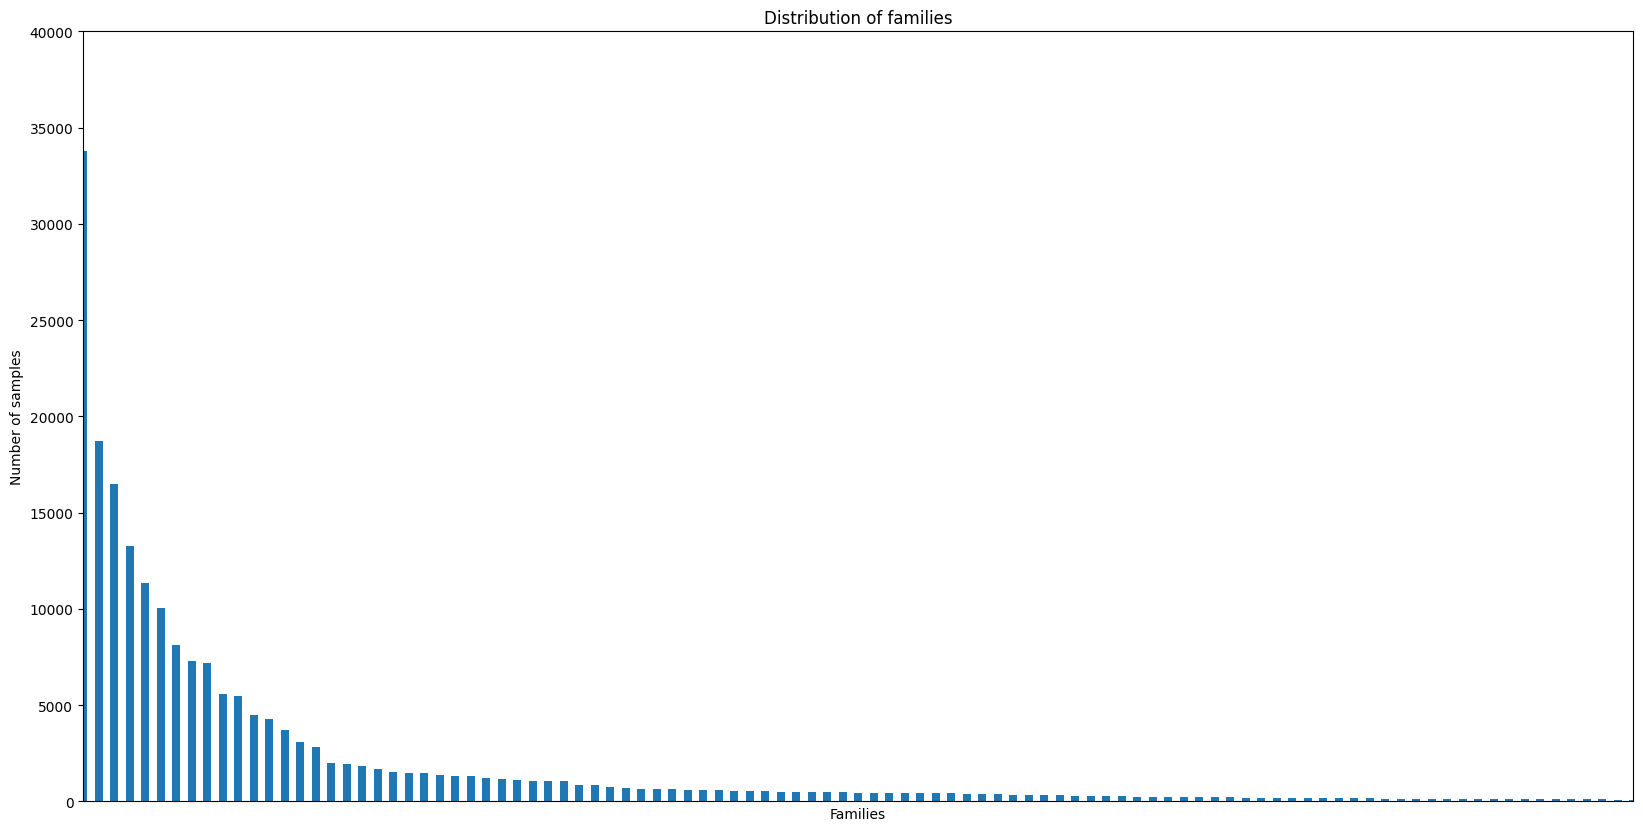

In [3]:
family_counts = df['family'].value_counts()

# Filter the families with more than one entry
scicore_filtered = df[df['family'].map(family_counts) > 1]
family_counts.plot(kind='bar', figsize=(20, 10))
plt.xticks([])
plt.ylim(0, 40000)
plt.xlim(0,100)
plt.ylabel('Number of samples')
plt.xlabel('Families')
plt.title('Distribution of families')
#plt.rcParams.update({'font.size': 22})

In [4]:
df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash,{'strings': 'T1E212E7DB1104D5268DC716B2880B19E...,{'machoke': '526cb6c74b6b4fe4ab698f6a149c2da4a...
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash,{'strings': 'T153E14A15A8F899E35597838855607B8...,{'machoke': 'c21014d561f4751fdaa6af077e8d16e1a...
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash,{'strings': 'T1865523536490B4B9B1EB478206F3A75...,"{'machoke': 'MNULL', 'hash_time': 0}"
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash,{'strings': 'T1401533932CF134146066EBB64D4FBCA...,{'machoke': 'fc420b141a25c1e87bff906654371d173...
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash,{'strings': 'T107653373A5E073D133E792E3A6CBEB5...,{'machoke': '9afe7f481a25c1e87bff906697df084cc...
...,...,...,...,...,...,...,...,...,...,...
208641,658f24555f823237b2e23b36,zxShell,fbe294910ef833e1c9b2c8663c06b6ef99c13b2bc5eb01...,1698208,NaN,NaN,NaN,NaN,{'strings': 'T173F301867C0624D5EBFFAEDB4D3A703...,NaN
208642,658f24555f823237b2e23b37,zxShell,fc3cacb2103adedc11720c34a243de58085c1a7283ba35...,204240,NaN,NaN,NaN,NaN,{'strings': 'T1BF62AFC75196B9D08B8A8F92E752A05...,NaN
208643,658f24555f823237b2e23b38,zxShell,dbd03093e58c2d60f4f47b720691cd3e6310f0566403ee...,1343952,NaN,NaN,NaN,NaN,{'strings': 'T1425302C618D220E6EF92DA1C95AB778...,NaN
208644,658f24555f823237b2e23b39,zxShell,e2d2761fc2535d99527df2f7cffd8dddccd504dc0096f6...,1181088,NaN,NaN,NaN,NaN,{'strings': 'T167B3E1E1659228B103A6CF4D5AE7770...,NaN


In [5]:
original_count = df.shape[0]

# Count the occurrences of each family
family_counts = df['family'].value_counts()

# Filter the DataFrame to keep families with more than one entry
machoke_filtered = mdf[mdf['family'].map(family_counts) > 1]
malware_filtered = df[df['family'].map(family_counts) > 1]
family_counts = malware_filtered['family'].value_counts()
# Get the new number of rows after filtering
filtered_count = malware_filtered.shape[0]

# Identify the families that were removed
removed_families = family_counts[family_counts == 1].index.tolist()

# Print the results
print(f"Original DataFrame had {original_count} rows.")
print(f"Filtered DataFrame has {filtered_count} rows.")
print(f"Amount of families: {len(family_counts)}")
print(f"Families removed (only had 1 entry): {removed_families}")

Original DataFrame had 208646 rows.
Filtered DataFrame has 208644 rows.
Amount of families: 525
Families removed (only had 1 entry): []


In [6]:
sampled_df = malware_filtered.groupby('family').apply(lambda x: x.sample(max(2, int(len(x) * 0.01))))

# only take 25% of machoke_filtered or 2
#sampled_m = machoke_filtered.groupby('family').apply(lambda y: y.sample(max(2, int(len(y) * 0.01)),replace=True))
sampled_m = machoke_filtered
# Reset index if necessary
sampled = sampled_df.reset_index(drop=True)
sampled_m = sampled_m.reset_index(drop=True)
sampled_m

,_id,family,SHA256,file_size,machoke
0,65ba486b152e1b0f569dbd29,SpiderpigRAT,7e9e2462f56b010de63341beffc4214ad98ea29c60b4bd...,2657792,{'machoke': 'Not a valid binary file /root/vx/...
1,65ba486b152e1b0f569dbd2a,SpiderpigRAT,627d7872dd8e223c68e9e1bcddc5eaec15aacf23115e61...,23692584,{'machoke': 'fc420b141a25c1e87bff906654371d173...
2,65ba486b152e1b0f569dbd2b,SpiderpigRAT,005b08d557ede5aa70a7c36043a98c7773462f43bc908a...,414720,{'machoke': 'a0b14fe53db8a17acde4b7653db8a17a1...
3,65ba486b152e1b0f569dbd2c,SpiderpigRAT,c7a67bfe46c1dd0b724028e4ab861b4df825add313ecae...,532536,{'machoke': 'a0b14fe51a02300ec21014d53db8a17af...
4,65ba486b152e1b0f569dbd2d,SpiderpigRAT,0c2092576e03917f35b42bc11bba901aaf37e044833d05...,782880,{'machoke': 'a0b14fe5c19ce261a02300e44c2d4b839...
...,...,...,...,...,...
8168,65ba486b152e1b0f569ddd13,Bashlite,f49597e6135cef0d76f78a3274b73105ab11bdb2957d36...,124662,{'machoke': '3db8a17a9597b0fa2560e1721a02300ef...
8169,65ba486b152e1b0f569ddd14,Bashlite,e2274b045272c88c8586fd6c7818de72d6a9a030ad9c1f...,111625,{'machoke': '3db8a17a9597b0fa3632f8f81a02300ef...
8170,65ba486b152e1b0f569ddd15,Bashlite,bb373e09e39cb4729817bc28f7e55c5fde69bcffdee314...,113009,{'machoke': '3db8a17a9597b0fa1a02300e1a02300e1...
8171,65ba486b152e1b0f569ddd16,Bashlite,f9ad2616ca5da3cf3f5d04e7f0fa27cfc62c434d3f57f9...,147518,{'machoke': '3db8a17a9597b0fa5da90e40476a7f451...


([], [])

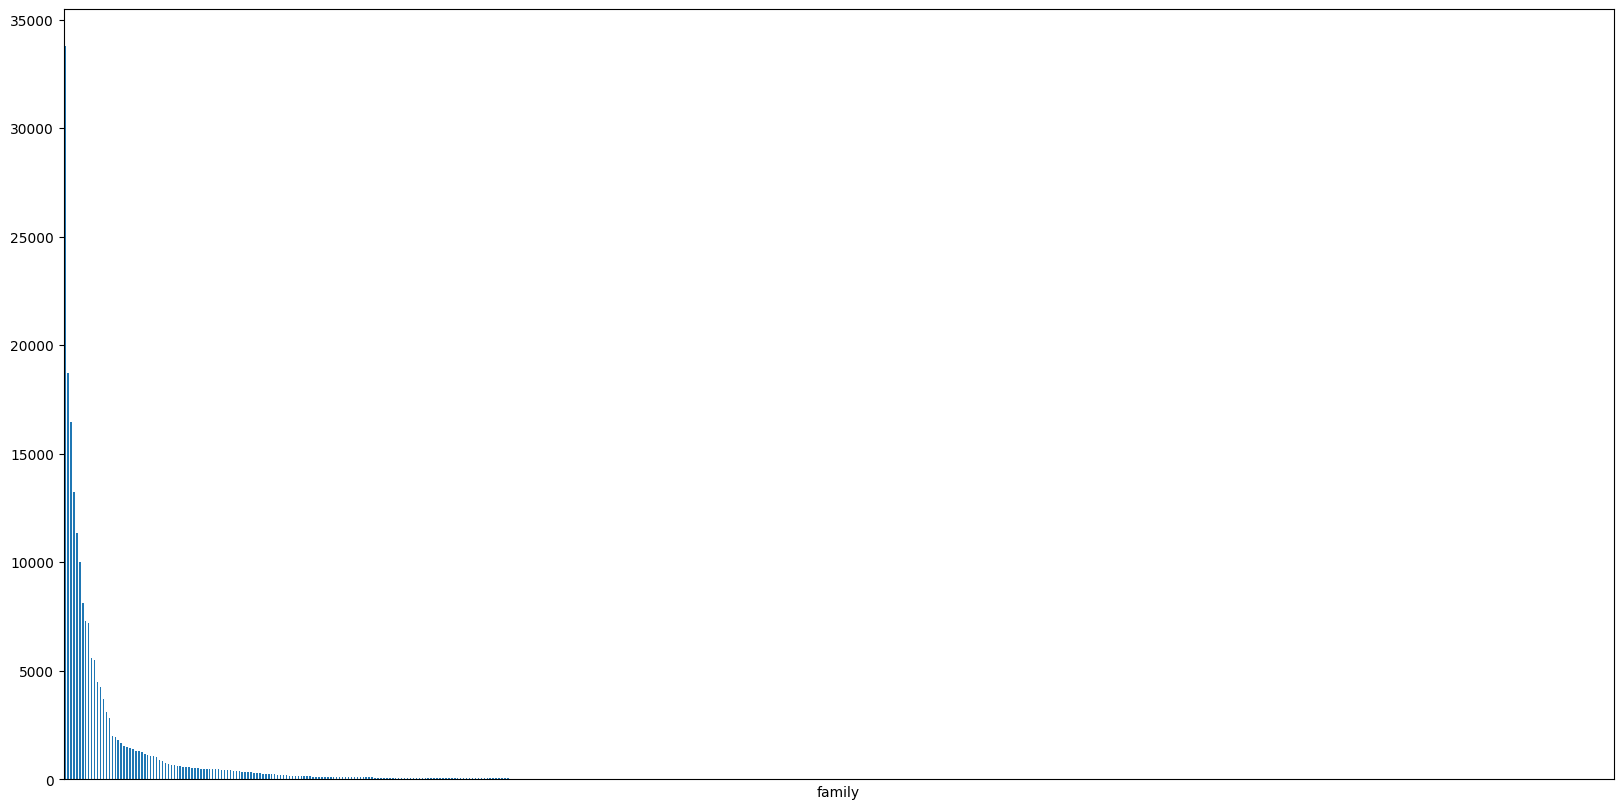

In [7]:
malware_filtered["family"].value_counts().plot(x="family", y="count", kind="bar", figsize=(20, 10))
plt.xticks([])

In [8]:
len(df["family"].unique())

527

In [9]:
malware_filtered["scicore"] = False
sampled["scicore"] = False
sampled_m["scicore"] = False
size = sampled.shape[0] / 20
msize = sampled_m.shape[0] / 20
scicore = pd.DataFrame(list(db["scicore"].aggregate([{"$sample": {"size": size}}])))
mscicore = pd.DataFrame(list(db["machoke"].aggregate([{"$sample": {"size": msize}}])))
scicore["scicore"] = True
mscicore["scicore"] = True
malware_concat = pd.concat([malware_filtered, scicore])
machoke_conat = pd.concat([sampled_m, mscicore])
machoke_conat

,_id,family,SHA256,file_size,machoke,scicore
0,65ba486b152e1b0f569dbd29,SpiderpigRAT,7e9e2462f56b010de63341beffc4214ad98ea29c60b4bd...,2657792,{'machoke': 'Not a valid binary file /root/vx/...,False
1,65ba486b152e1b0f569dbd2a,SpiderpigRAT,627d7872dd8e223c68e9e1bcddc5eaec15aacf23115e61...,23692584,{'machoke': 'fc420b141a25c1e87bff906654371d173...,False
2,65ba486b152e1b0f569dbd2b,SpiderpigRAT,005b08d557ede5aa70a7c36043a98c7773462f43bc908a...,414720,{'machoke': 'a0b14fe53db8a17acde4b7653db8a17a1...,False
3,65ba486b152e1b0f569dbd2c,SpiderpigRAT,c7a67bfe46c1dd0b724028e4ab861b4df825add313ecae...,532536,{'machoke': 'a0b14fe51a02300ec21014d53db8a17af...,False
4,65ba486b152e1b0f569dbd2d,SpiderpigRAT,0c2092576e03917f35b42bc11bba901aaf37e044833d05...,782880,{'machoke': 'a0b14fe5c19ce261a02300e44c2d4b839...,False
...,...,...,...,...,...,...
403,65a71cd0d3d7ae3f0e40be34,OpenStructure,e78a8396468d2b9c9d1e29c164eb22cbc10e7d85280c3c...,89328,{'machoke': '3db8a17a1a02300e1a02300e1a02300e3...,True
404,65a71cd0d3d7ae3f0e40bcb8,Salmon,e1f8e854b601d9ca51d750921a23bcd481381260355ac4...,19432688,{'machoke': 'r2 timeout /users/stud/z/zeqiri00...,True
405,65a71cd0d3d7ae3f0e40bcda,SQLite,44a3b182f305030d099b5a702ce45d1e9febdbaa772f86...,1289112,{'machoke': '3db8a17a1a02300e1a02300ec19ce261a...,True
406,65a71cd0d3d7ae3f0e40bcf2,SIP,0252cdc292d4e81bb448cd25f8b232099f9e23d905f9a4...,376692,{'machoke': '3db8a17a1a02300e6c73a7c7618acb124...,True


In [10]:
a = malware_concat
a = a[a['tlsh'] != 'TNULL']
a.dropna(subset=['tlsh'], inplace=True)
a.dropna(subset=['ssdeep'], inplace=True)
a.dropna(subset=['strings'], inplace=True)
a[a["SHA256"] == "0000015bf5f766e7a709983fe08a8d6983fb5d49213d4389871c2b69e6c19b25"]



,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,scicore
54788,65638d463624482ac9d26de7,Koadic,0000015bf5f766e7a709983fe08a8d6983fb5d49213d43...,138752,{'ssdeep': '3072:3U/9+vstGGGFOn+tdHhVfErWGQ+SB...,sdhash hash,{'tlsh': 'T1BAD3AE4376C25372E5C116B101A529BBEB...,Machoc hash,{'strings': 'T1A9421C8B18DA396AE1370522C6FCA18...,NaN,False


In [11]:
a = a[a['tlsh'] != 'TNULL']
(a["tlsh"] == "TNULL").sum()

0

In [12]:

a['tlsh'] = a['tlsh'].apply(lambda x: x['tlsh'] if 'tlsh' in x and isinstance(x, dict) else x)
a = a[a['tlsh'] != 'TNULL']
a['ssdeep'] = a['ssdeep'].apply(lambda x: x['ssdeep'] if 'ssdeep' in x and isinstance(x, dict) else x)

a['strings'] = a['strings'].apply(lambda x: x['strings'] if 'strings' in x and isinstance(x, dict) else x)
a = a[a['strings'] != 'TNULL']
filtered_df = a

In [13]:
(filtered_df["tlsh"] == "TNULL").sum()

0

In [14]:
"""def calculate_metrics(values, function):
    if not values:
        return np.nan, np.nan, np.nan, 0

    results = [function(a, b) for a, b in itertools.combinations(values, 2)]
    return np.mean(results), np.median(results), np.std(results), len(results)

def process_group(group):
    family = group['family'].iloc[0]
    tlsh_values = group['tlsh'].tolist()
    ssdeep_values = group['ssdeep'].tolist()
    strings_values = group['strings'].tolist()

    tlsh_mean, tlsh_median, tlsh_std, tlsh_amount = calculate_metrics(tlsh_values, tlsh.diff)
    ssdeep_mean, ssdeep_median, ssdeep_std, ssdeep_amount = calculate_metrics(ssdeep_values, ssdeep.compare)
    strings_mean, strings_median, strings_std, strings_amount = calculate_metrics(strings_values, tlsh.diff)

    return {
        'family': family,
        'tlsh': {'mean': tlsh_mean, 'median': tlsh_median, 'std': tlsh_std, 'amount': tlsh_amount},
        'ssdeep': {'mean': ssdeep_mean, 'median': ssdeep_median, 'std': ssdeep_std, 'amount': ssdeep_amount},
        'strings': {'mean': strings_mean, 'median': strings_median, 'std': strings_std, 'amount': strings_amount}
    }
"""
"""with ThreadPoolExecutor() as executor:
    results = list(executor.map(process_group, [group for _, group in filtered_df.groupby('family')]))

# Transform results into DataFrames
fam_tlsh = pd.DataFrame([{'family': res['family'], **res['tlsh']} for res in results])
fam_ssdeep = pd.DataFrame([{'family': res['family'], **res['ssdeep']} for res in results])
fam_strings = pd.DataFrame([{'family': res['family'], **res['strings']} for res in results])"""
"""
import itertools
# Pre-calculate combinations for both tlsh and ssdeep

# Assuming filtered_df, tlsh, ssdeep are defined elsewhere

# Initialize lists to store data for DataFrame creation
tlsh_data = []
ssdeep_data = []
strings_data = []

for family, group in filtered_df.groupby('family'):
    # Extract the values for tlsh and ssdeep
    tlsh_values = group['tlsh'].tolist()
    ssdeep_values = group['ssdeep'].tolist()
    strings_values = group['strings'].tolist()

    # Calculate combinations and their respective differences/similarities
    tlsh_combinations = itertools.combinations(tlsh_values, 2)
    ssdeep_combinations = itertools.combinations(ssdeep_values, 2)
    strings_combinations = itertools.combinations(strings_values, 2)
    

    tlsh_diffs = [tlsh.diff(a, b) for a, b in tlsh_combinations]
    ssdeep_scores = [ssdeep.compare(a, b) for a, b in ssdeep_combinations]
    strings_diffs = [tlsh.diff(a, b) for a, b in strings_combinations]
    

    # Append the results to the lists
    tlsh_data.append({
        'family': family,
        'values': tlsh_diffs,
        'mean': np.mean(tlsh_diffs) if tlsh_diffs else np.nan,
        'median': np.median(tlsh_diffs) if tlsh_diffs else np.nan,
        'std': np.std(tlsh_diffs) if tlsh_diffs else np.nan,
        'amount': len(tlsh_diffs)
    })

    ssdeep_data.append({
        'family': family,
        'values': ssdeep_scores,
        'mean': np.mean(ssdeep_scores) if ssdeep_scores else np.nan,
        'median': np.median(ssdeep_scores) if ssdeep_scores else np.nan,
        'std': np.std(ssdeep_scores) if ssdeep_scores else np.nan,
        'amount': len(ssdeep_scores)
    })
    
    strings_data.append({
        'family': family,
        'values': strings_diffs,
        'mean': np.mean(strings_diffs) if strings_diffs else np.nan,
        'median': np.median(strings_diffs) if strings_diffs else np.nan,
        'std': np.std(strings_diffs) if strings_diffs else np.nan,
        'amount': len(strings_diffs)
    })

# Create DataFrames from the lists
fam_tlsh = pd.DataFrame(tlsh_data)
fam_ssdeep = pd.DataFrame(ssdeep_data)
fam_strings = pd.DataFrame(strings_data)
fam_tlsh = fam_tlsh[fam_tlsh['amount'] > 1]
fam_tlsh[["mean","median","std"]].boxplot()
fam_ssdeep = fam_ssdeep[fam_ssdeep['amount'] > 1]
fam_ssdeep[["mean","median","std"]].boxplot()
fam_strings = fam_strings[fam_strings['amount'] > 1]
fam_strings[["mean","median","std"]].boxplot()"""

'\nimport itertools\n# Pre-calculate combinations for both tlsh and ssdeep\n\n# Assuming filtered_df, tlsh, ssdeep are defined elsewhere\n\n# Initialize lists to store data for DataFrame creation\ntlsh_data = []\nssdeep_data = []\nstrings_data = []\n\nfor family, group in filtered_df.groupby(\'family\'):\n    # Extract the values for tlsh and ssdeep\n    tlsh_values = group[\'tlsh\'].tolist()\n    ssdeep_values = group[\'ssdeep\'].tolist()\n    strings_values = group[\'strings\'].tolist()\n\n    # Calculate combinations and their respective differences/similarities\n    tlsh_combinations = itertools.combinations(tlsh_values, 2)\n    ssdeep_combinations = itertools.combinations(ssdeep_values, 2)\n    strings_combinations = itertools.combinations(strings_values, 2)\n    \n\n    tlsh_diffs = [tlsh.diff(a, b) for a, b in tlsh_combinations]\n    ssdeep_scores = [ssdeep.compare(a, b) for a, b in ssdeep_combinations]\n    strings_diffs = [tlsh.diff(a, b) for a, b in strings_combinations]\n   

In [15]:
# load a csv from a path into the variable tlsh_best
tlsh_best = pd.read_csv("../miniHPC/tlsh_results.csv")
strings_best = pd.read_csv("../miniHPC/strings_results.csv")
ssdeep_best = pd.read_csv("../miniHPC/ssdeep_results.csv")
# drop all entries where the score is 0
tlsh_best = tlsh_best[tlsh_best["Diff Score"] != 0]
strings_best = strings_best[strings_best["Diff Score"] != 0]

tlsh_right = (tlsh_best["Family 1"] == tlsh_best["Family 2"]).value_counts()
print(f'TLSH got so many right: {tlsh_right}, {tlsh_right / len(tlsh_best)} \n Strings got so many right: {(strings_best["Family 1"] == strings_best["Family 2"]).value_counts()}, {(strings_best["Family 1"] == strings_best["Family 2"]).value_counts() / len(strings_best)}')

ssdeep_right = (ssdeep_best["Family 1"] == ssdeep_best["Family 2"]).value_counts()
print(f'SSDEEP got so many right: {ssdeep_right}, {ssdeep_right / len(ssdeep_best)}')

string_right = (strings_best["Family 1"] == strings_best["Family 2"]).value_counts()
print(f'Strings got so many right: {string_right}, {string_right / len(strings_best)}')

TLSH got so many right: True     86042
False     8965
Name: count, dtype: int64, True     0.905639
False    0.094361
Name: count, dtype: float64 
 Strings got so many right: True     66837
False     8845
Name: count, dtype: int64, True     0.883129
False    0.116871
Name: count, dtype: float64
SSDEEP got so many right: True     88088
False    22746
Name: count, dtype: int64, True     0.794774
False    0.205226
Name: count, dtype: float64
Strings got so many right: True     66837
False     8845
Name: count, dtype: int64, True     0.883129
False    0.116871
Name: count, dtype: float64


In [16]:
sampled_concat = pd.concat([sampled, scicore])
sampled_concat

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,scicore
0,6563778d3624482ac9d19846,9002Rat,f462ee6e825a7870472fdfeafccef25f6a848115308ec1...,78336,{'ssdeep': '1536:AsK9zX4JPraQk/qht7+LkIAEyrP8x...,sdhash hash,{'tlsh': 'T115739D107691C2B6C06A29304865DB726B...,Machoc hash,{'strings': 'T1C5E12806ACB8A8E34687838194547B9...,{'machoke': 'c21014d561f4751fdaa6af07afc290b1a...,False
1,6563777c3624482ac9d19815,9002Rat,6cd8eddf21aacaccddffd9949b60201e086ccac434f707...,20049664,{'ssdeep': '393216:IvT/YZnr649PSbNv1sZpyCP34C+...,sdhash hash,{'tlsh': 'T192173316C45304BCC2EFBC375222154A22...,Machoc hash,{'strings': 'T1B25533F29CE07B9523AF8653C79F7F2...,{'machoke': '6d40784c86e1857e1a02300ea65a47fb5...,False
2,658f1a215f823237b2e0a452,ABCBot,a8e6f49731caf71659d3ecabfdbf3a6cbb8cf6c51177ed...,9842,NaN,NaN,NaN,NaN,{'strings': 'T16312CD4C7546CEB49DAC58684F912F0...,NaN,False
3,6563778e3624482ac9d1984c,ABCBot,a8e6f49731caf71659d3ecabfdbf3a6cbb8cf6c51177ed...,9842,{'ssdeep': '192:VNG51NscCN6fGNljAYMzAbZQAyu9A9...,sdhash hash,{'tlsh': 'T12B12BE4C7546CEF4989858E84F912F04A9...,Machoc hash,{'strings': 'T16312CD4C7546CEB49DAC58684F912F0...,{'machoke': 'Not a valid binary file F:\vx\ABC...,False
4,6563778e3624482ac9d1984e,AceDeceiver,0a8e29bd8fe0f5d4d6a8677454b1d01e97478dc4bc3666...,4555908,{'ssdeep': '98304:CMCBHgWmHlsojGK9RnkTjVYHJ8C1...,sdhash hash,{'tlsh': 'T1812623F5D23C6431DA0E1ABAD042E581D4...,Machoc hash,{'strings': 'T119747C90A7AEAE2649122EDBB592E98...,{'machoke': 'Not a valid binary file F:\vx\Ace...,False
...,...,...,...,...,...,...,...,...,...,...,...
136,581,expat,8dbd1ad1fbef83eb0f482289bed3a921bf57790b16bdaf...,30824,{'ssdeep': '384:WwZB6SYrLMOvwaAU4USjvfu31VmZDF...,sdhash hash,{'tlsh': 'T1CED2A547F5A9893AC5945E34C49FD9935E...,Machoc hash,{'strings': 'T1C8D160F2B4B6A47B86C6366961045F9...,NaN,True
137,968,OpenMalaria,74b6492bfd0ebce4a0d63670437c57e3dc626b3089f690...,7678456,{'ssdeep': '49152:kj0opEb4gHWAj0byL89Ak6LDs4zA...,sdhash hash,{'tlsh': 'T104768D23F986E93CCCCCB7B11A5F3126A6...,Machoc hash,{'strings': 'T16EA5A4F60283FF248DC927B62E9B711...,NaN,True
138,1498,M4,bb650a80874af78d8f18b0dd6ddf815936e528c8c2faa8...,176784,{'ssdeep': '3072:bG7IXFRZtlfTMzRk/TBkEq1xTpEB9...,sdhash hash,{'tlsh': 'T17E043A17B1E24CFEC1D2C4304B6B9192A9...,Machoc hash,{'strings': 'T1DED2B412AD50657B02D25AB2E366925...,NaN,True
139,1556,VSEARCH,e458b7599b5a35fd849ea369841995bfc98f1f0927ba06...,434872,{'ssdeep': '6144:Y6yAbOafUZAEaxs4rzWYlBrhkbT5N...,sdhash hash,{'tlsh': 'T1EA945C07BB9215AEC1A3C672579B56727A...,Machoc hash,{'strings': 'T193A30A575DD2255703E3D3A2B38192A...,NaN,True


In [17]:
sampled_concat = sampled_concat[sampled_concat != 'nan']
sampled_concat.dropna(subset=['tlsh'], inplace=True)
sampled_concat.dropna(subset=['ssdeep'], inplace=True)
sampled_concat.dropna(subset=['strings'], inplace=True)
sampled_concat["tlsh"] = sampled_concat["tlsh"].apply(lambda x: x["tlsh"] if isinstance(x, dict) else x)
sampled_concat["ssdeep"] = sampled_concat["ssdeep"].apply(lambda x: x["ssdeep"] if isinstance(x, dict) else x)
sampled_concat["strings"] = sampled_concat["strings"].apply(lambda x: x["strings"] if isinstance(x, dict) else x)


In [18]:
import sys
def tlsh_comb(df, col='tlsh'):
    from itertools import combinations
    
    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[[col, 'family', 'scicore']].iterrows(), 2)
    
    # Apply tlsh.diff to each combination
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
        a = (row1[col])
        b = (row2[col])
        if a == "TNULL" or b == "TNULL":
            continue
        try:
            diff_score = tlsh.diff(a,b)
        except:
            print(a,b)
            sys.exit()
        results.append((row1['family'], row2['family'], row1['scicore'], row2['scicore'], row1[col], row2[col], diff_score))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Scicore 1', "Scicore 2", 'TLSH 1', 'TLSH 2', 'Diff Score'])
    
    return results_df
#tlsh_best = tlsh_comb(df=sampled_concat)
#strings_best = tlsh_comb(df=sampled_concat, col='strings')

In [19]:
def ssdeep_comb(df):
    from itertools import combinations
    
    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[['ssdeep', 'family', 'scicore']].iterrows(), 2)
    
    # Apply tlsh.diff to each combination
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
        diff_score = ssdeep.compare(row1['ssdeep'], row2['ssdeep'])
        if diff_score == 0:
            results.append((row1['family'], "No Match", row1['scicore'], row2['scicore'], row1['ssdeep'], row2['ssdeep'], diff_score))
        else:
            results.append((row1['family'], row2['family'], row1['scicore'], row2['scicore'], row1['ssdeep'], row2['ssdeep'], diff_score))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Scicore 1', "Scicore 2", 'ssdeep 1', 'ssdeep 2', 'Diff Score'])
    
    return results_df
#ssdeep_best = ssdeep_comb(df=sampled_concat)

In [20]:
"""tlsh_best = tlsh_best.loc[tlsh_best.groupby("TLSH 1")["Diff Score"].idxmin()]
strings_best = strings_best.loc[strings_best.groupby("TLSH 1")["Diff Score"].idxmin()]
ssdeep_best = ssdeep_best.loc[ssdeep_best.groupby("ssdeep 1")["Diff Score"].idxmax()]
ssdeep_best"""

'tlsh_best = tlsh_best.loc[tlsh_best.groupby("TLSH 1")["Diff Score"].idxmin()]\nstrings_best = strings_best.loc[strings_best.groupby("TLSH 1")["Diff Score"].idxmin()]\nssdeep_best = ssdeep_best.loc[ssdeep_best.groupby("ssdeep 1")["Diff Score"].idxmax()]\nssdeep_best'

In [21]:
tlsh_best.shape[0]

95007

In [1]:
def tlsh_thresh(df_best):
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = df_best[df_best["Scicore 1"] == False]
    compt_to_malware = df_best[df_best["Scicore 2"] == True]
    for i in range (0,300,10):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] < i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = tlsh_thresh(tlsh_best)
s = tlsh_thresh(strings_best)
s

NameError: name 'tlsh_best' is not defined

In [73]:
def tlsh_f1(s):
    ssdeep_th = pd.DataFrame(columns=["threshold", "f1", "accuracy", "precision", "recall","total"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (2,300,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] < i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        total = len(sci_th) / len(s)
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + TN != 0 else 0
        
        f1 = (2 * precision * recall) / (precision + recall)
        accuracy = (TP + TN) / (TP + FP + FN + TN)
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, f1, accuracy, precision, recall, total]
    return ssdeep_th
f1_tlsh = tlsh_f1(tlsh_best)
f1_strings = tlsh_f1(strings_best)

In [74]:
def ssdeep_thresh(s):

    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (-1,101,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
d = ssdeep_thresh(ssdeep_best)
d

,threshold,true_positive_rate,false_positive_rate
-1,-1.0,1.000000,1.000000
0,0.0,1.000000,1.000000
1,1.0,1.000000,1.000000
2,2.0,1.000000,1.000000
3,3.0,1.000000,1.000000
...,...,...,...
96,96.0,0.989994,0.030089
97,97.0,0.987537,0.019557
98,98.0,0.985387,0.012450
99,99.0,0.985387,0.012450


In [75]:
"""machoke_conat"""

,_id,family,SHA256,file_size,machoke,scicore
0,65ba486b152e1b0f569dbd29,SpiderpigRAT,7e9e2462f56b010de63341beffc4214ad98ea29c60b4bd...,2657792,{'machoke': 'Not a valid binary file /root/vx/...,False
1,65ba486b152e1b0f569dbd2a,SpiderpigRAT,627d7872dd8e223c68e9e1bcddc5eaec15aacf23115e61...,23692584,{'machoke': 'fc420b141a25c1e87bff906654371d173...,False
2,65ba486b152e1b0f569dbd2b,SpiderpigRAT,005b08d557ede5aa70a7c36043a98c7773462f43bc908a...,414720,{'machoke': 'a0b14fe53db8a17acde4b7653db8a17a1...,False
3,65ba486b152e1b0f569dbd2c,SpiderpigRAT,c7a67bfe46c1dd0b724028e4ab861b4df825add313ecae...,532536,{'machoke': 'a0b14fe51a02300ec21014d53db8a17af...,False
4,65ba486b152e1b0f569dbd2d,SpiderpigRAT,0c2092576e03917f35b42bc11bba901aaf37e044833d05...,782880,{'machoke': 'a0b14fe5c19ce261a02300e44c2d4b839...,False
...,...,...,...,...,...,...
403,65a71cd0d3d7ae3f0e40bc14,andi,9aa7af1a016a88a5b777daa0988249ed7e3de607536d2d...,51176,{'machoke': '3db8a17a1a02300ec19ce261a02300e1a...,True
404,65a71cd0d3d7ae3f0e40bbd6,cURL,572d2be483dffd1c57bbff75934ca9fd0c2b868d1c3ddf...,264792,{'machoke': '3db8a17a1a02300e1a02300e1a02300e1...,True
405,65a71cd0d3d7ae3f0e40bbc6,chewBBACA,00032e807a397af98cd0ff8f298f235215a9b6feada22d...,348,{'machoke': 'Not a valid binary file /users/st...,True
406,65a71cd0d3d7ae3f0e40be5d,OpenMPI,668c00a3ed5768b90810a07e87e78686e35e62f5929352...,29784,{'machoke': '3db8a17a1a02300e1a02300ec19ce261a...,True


In [76]:
"""
machoke_conat.dropna(subset=['machoke'], inplace=True)
machoke_conat['machoke'] = machoke_conat['machoke'].apply(lambda x: x['machoke'] if 'machoke' in x and isinstance(x, dict) else x)

# drop on row "machoke" if it starts with "Not"
machoke_conat = machoke_conat[~machoke_conat['machoke'].str.startswith('Not')]
machoke_conat = machoke_conat[~machoke_conat['machoke'].str.startswith('r2')]

# remove on "machoke" everything after "\t"
machoke_conat['machoke'] = machoke_conat['machoke'].apply(lambda x: x.split("\t")[0])
machoke_conat"""

,_id,family,SHA256,file_size,machoke,scicore
1,65ba486b152e1b0f569dbd2a,SpiderpigRAT,627d7872dd8e223c68e9e1bcddc5eaec15aacf23115e61...,23692584,fc420b141a25c1e87bff906654371d173d91442c19ce26...,False
2,65ba486b152e1b0f569dbd2b,SpiderpigRAT,005b08d557ede5aa70a7c36043a98c7773462f43bc908a...,414720,a0b14fe53db8a17acde4b7653db8a17a1a02300e44c2d4...,False
3,65ba486b152e1b0f569dbd2c,SpiderpigRAT,c7a67bfe46c1dd0b724028e4ab861b4df825add313ecae...,532536,a0b14fe51a02300ec21014d53db8a17af3bb8284e46075...,False
4,65ba486b152e1b0f569dbd2d,SpiderpigRAT,0c2092576e03917f35b42bc11bba901aaf37e044833d05...,782880,a0b14fe5c19ce261a02300e44c2d4b839b73256816b722...,False
5,65ba486b152e1b0f569dbd2e,SpiderpigRAT,a1ab063481083894f704823889c3126b9cc7c8a724f32c...,776338,cc8d0ff61a02300e,False
...,...,...,...,...,...,...
402,65a71cd0d3d7ae3f0e40be27,OpenStructure,d41af62e6991f112b11149b4669ca273f0065609579c69...,82696,3db8a17a1a02300ec4d3411ec4d3411ec19ce261a02300...,True
403,65a71cd0d3d7ae3f0e40bc14,andi,9aa7af1a016a88a5b777daa0988249ed7e3de607536d2d...,51176,3db8a17a1a02300ec19ce261a02300e1a02300ec4d3411...,True
404,65a71cd0d3d7ae3f0e40bbd6,cURL,572d2be483dffd1c57bbff75934ca9fd0c2b868d1c3ddf...,264792,3db8a17a1a02300e1a02300e1a02300e1a02300e1a0230...,True
406,65a71cd0d3d7ae3f0e40be5d,OpenMPI,668c00a3ed5768b90810a07e87e78686e35e62f5929352...,29784,3db8a17a1a02300e1a02300ec19ce261a02300ec4d3411...,True


In [101]:
"""from itertools import combinations
from sklearn.metrics import jaccard_score
def jaccard_distance_sklearn(str1, str2, n=2):
    # Function to generate n-grams from a string
    def ngrams(s, n):
        return set([s[i:i+n] for i in range(len(s) - n + 1)])

    # Convert inputs to strings if they are not
    str1 = str(str1) if not isinstance(str1, str) else str1
    str2 = str(str2) if not isinstance(str2, str) else str2

    # Create n-grams for each string
    set1 = ngrams(str1, n)
    set2 = ngrams(str2, n)

    # Calculate Jaccard similarity and convert to distance
    if len(set1.union(set2)) == 0:  # Avoid division by zero
        return 1.0 if set1 != set2 else 0.0
    similarity = len(set1.intersection(set2)) / len(set1.union(set2))

    return similarity


def machoke_comb(df):

    string_combinations = combinations(df[['machoke', 'family', 'scicore']].iterrows(), 2)
    results = []
    i = 0
    for (idx1, row1), (idx2, row2) in string_combinations:
        diff_score = jaccard_distance_sklearn(row1['machoke'], row2['machoke'])
        if diff_score == 0:
            results.append((row1['family'], "No Match", row1['scicore'], row2['scicore'], row1['machoke'], row2['machoke'], diff_score))
        else:
            results.append((row1['family'], row2['family'], row1['scicore'], row2['scicore'], row1['machoke'], row2['machoke'], diff_score))
        i += 1
        if i % 10000 == 0:
            # format to 2 decimal places
            print(f"Progress: {i / 1997001:.2f}")
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Scicore 1', "Scicore 2", 'Machoke 1', 'Machoke 2', 'Diff Score'])
    results_df = results_df.loc[results_df.groupby("Machoke 1")["Diff Score"].idxmax()]
    return results_df

machoke_best = machoke_comb(df=machoke_conat)
machoke_best"""

Progress: 0.01
Progress: 0.01
Progress: 0.02
Progress: 0.02
Progress: 0.03
Progress: 0.03
Progress: 0.04
Progress: 0.04
Progress: 0.05
Progress: 0.05
Progress: 0.06
Progress: 0.06
Progress: 0.07
Progress: 0.07
Progress: 0.08
Progress: 0.08
Progress: 0.09
Progress: 0.09
Progress: 0.10
Progress: 0.10
Progress: 0.11
Progress: 0.11
Progress: 0.12
Progress: 0.12
Progress: 0.13
Progress: 0.13
Progress: 0.14
Progress: 0.14
Progress: 0.15
Progress: 0.15
Progress: 0.16
Progress: 0.16
Progress: 0.17
Progress: 0.17
Progress: 0.18
Progress: 0.18
Progress: 0.19
Progress: 0.19
Progress: 0.20
Progress: 0.20
Progress: 0.21
Progress: 0.21
Progress: 0.22
Progress: 0.22
Progress: 0.23
Progress: 0.23
Progress: 0.24
Progress: 0.24
Progress: 0.25
Progress: 0.25
Progress: 0.26
Progress: 0.26
Progress: 0.27
Progress: 0.27
Progress: 0.28
Progress: 0.28
Progress: 0.29
Progress: 0.29
Progress: 0.30
Progress: 0.30
Progress: 0.31
Progress: 0.31
Progress: 0.32
Progress: 0.32
Progress: 0.33
Progress: 0.33
Progress: 

KeyboardInterrupt: 

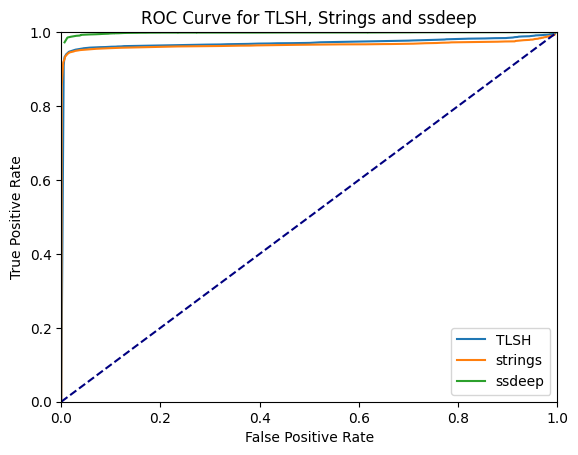

In [ ]:
# plot the roc curve of variable 'd', 't', 's'
plt.plot(p["false_positive_rate"], p["true_positive_rate"], label="TLSH")
plt.plot(s["false_positive_rate"], s["true_positive_rate"], label="strings")
plt.plot(d["false_positive_rate"], d["true_positive_rate"], label="ssdeep")
#plt.plot(m["false_positive_rate"], m["true_positive_rate"], label="machoke")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for TLSH, Strings and ssdeep")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

In [ ]:
# calculate the area under the curve for variable 'd', 't', 's'
from sklearn.metrics import auc
print(f"TLSH: {auc(p['false_positive_rate'], p['true_positive_rate'])}")
print(f"strings: {auc(s['false_positive_rate'], s['true_positive_rate'])}")
print(f"ssdeep: {auc(d['false_positive_rate'], d['true_positive_rate'])}")
#print(f"machoke: {auc(m['false_positive_rate'], m['true_positive_rate'])}")


TLSH: 0.9650458744179102
strings: 0.9599974577166032
ssdeep: 0.9918152704595501


In [ ]:
print(f'The optimal Threshold is: {(p["true_positive_rate"] - p["false_positive_rate"]).abs().idxmax()}')

The optimal Threshold is: 11


In [ ]:
def ssdeep_f1(s):

    ssdeep_th = pd.DataFrame(columns=["threshold", "f1", "accuracy", "precision", "recall","total"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (1,100,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        total = len(sci_th) / len(s)
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + TN != 0 else 0
        
        f1 = (2 * precision * recall) / (precision + recall)
        accuracy = (TP + TN) / (TP + FP + FN + TN)
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, f1, accuracy, precision, recall, total]
    return ssdeep_th
f1_ssdeep = ssdeep_f1(ssdeep_best)
#f1_machoke = ssdeep_f1(machoke_best)

'f1_machoke.plot(x="threshold", y=["f1","recall", "precision"], ylim=[0,1] ,title="F1 Score for machoke")\nx = (abs(f1_machoke["recall"] - f1_machoke["precision"])).idxmin()\ny = f1_machoke["f1"].max()\nplt.plot(x, y-0.05, \'ro\')\nplt.axvline(x=x, color=\'gray\', linestyle=\'--\')\nplt.text(x, y-0.09, f\'  {x}\', ha=\'left\', va=\'center\', fontsize=10, color=\'black\')\nplt.ylim([0.0, 1.0])\nplt.xlim([0.0, 100.0])'

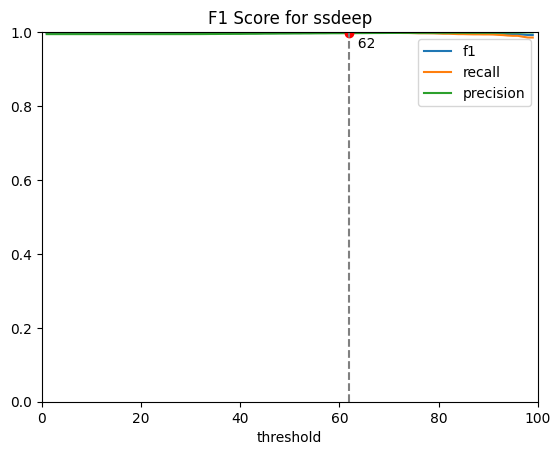

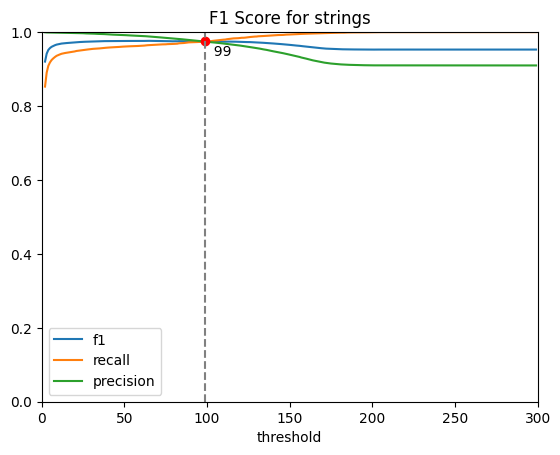

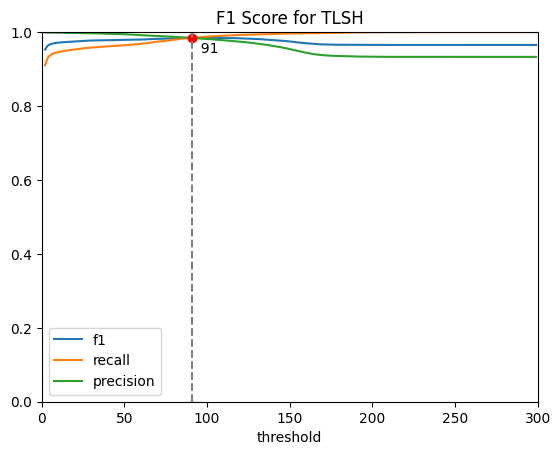

In [ ]:
f1_ssdeep.plot(x="threshold", y=["f1","recall","precision"], ylim=[0,1] ,title="F1 Score for ssdeep")
# make a red dot on the max of f1
x = f1_ssdeep["f1"].idxmax()
y = f1_ssdeep["f1"].max()
plt.plot(x, y, 'ro')
plt.axvline(x=x, color='gray', linestyle='--')
plt.text(x, y-0.03, f'  {x}', ha='left', va='center', fontsize=10, color='black')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 100.0])
f1_strings.plot(x="threshold", y=["f1","recall", "precision"], ylim=[0,1] ,title="F1 Score for strings")
x = (abs(f1_strings["recall"] - f1_strings["precision"])).idxmin()
y = f1_strings["f1"].max()
plt.plot(x, y, 'ro')
plt.axvline(x=x, color='gray', linestyle='--')
plt.text(x, y-0.03, f'  {x}', ha='left', va='center', fontsize=10, color='black')

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 300.0])
f1_tlsh.plot(x="threshold", y=["f1","recall", "precision"], ylim=[0,1] ,title="F1 Score for TLSH")
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 300.0])

x = (abs(f1_tlsh["recall"] - f1_tlsh["precision"])).idxmin()
y = f1_tlsh["f1"].max()
plt.plot(x, y, 'ro')
plt.axvline(x=x, color='gray', linestyle='--')
plt.text(x, y-0.03, f'  {x}', ha='left', va='center', fontsize=10, color='black')

"""f1_machoke.plot(x="threshold", y=["f1","recall", "precision"], ylim=[0,1] ,title="F1 Score for machoke")
x = (abs(f1_machoke["recall"] - f1_machoke["precision"])).idxmin()
y = f1_machoke["f1"].max()
plt.plot(x, y-0.05, 'ro')
plt.axvline(x=x, color='gray', linestyle='--')
plt.text(x, y-0.09, f'  {x}', ha='left', va='center', fontsize=10, color='black')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 100.0])"""



'f1_machoke.plot(x="threshold", y=["total", "precision"], ylim=[0,1] ,title="F1 Score for machoke")\nplt.ylim([0.0, 1.0])\nplt.xlim([0.0, 100.0])\nx = (abs(f1_machoke[f1_machoke["threshold"] > 3]["recall"] - f1_machoke["precision"])).idxmin()\ny = f1_machoke["f1"].max()\nplt.axvline(x=x, color=\'gray\', linestyle=\'--\')\nplt.text(x, y+0.02, f\'  {x}\', ha=\'left\', va=\'center\', fontsize=10, color=\'black\')\nplt.plot(x, y-0.04, \'bo\')\nplt.title("Edi Curve for machoke")\ntmpx = 7\ntmpy = 0.72\nplt.axvline(x=tmpx, color=\'blue\', linestyle=\'--\')\n# Annotate the x value of the intersection point directly on the x-axis\nplt.plot(tmpx, tmpy, \'ro\')\nplt.text(tmpx, tmpy -0.06, f\'  {tmpx}\', ha=\'left\', va=\'center\', fontsize=10, color=\'black\')'

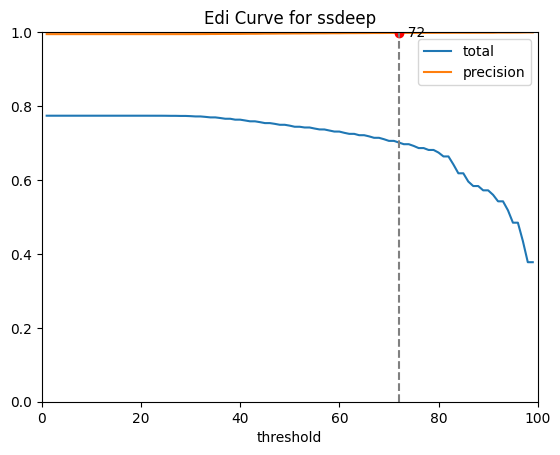

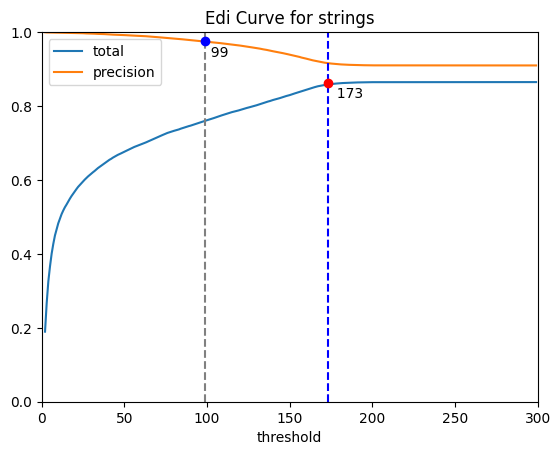

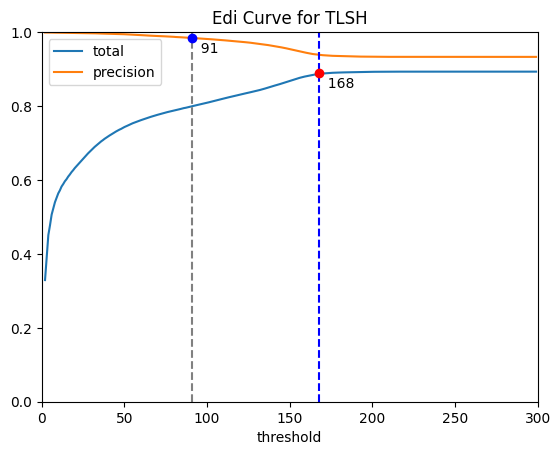

In [ ]:
f1_ssdeep.plot(x="threshold", y=["total","precision"], ylim=[0,1] ,title="F1 Score for ssdeep")
x = (abs(f1_ssdeep["recall"] - f1_ssdeep["precision"])).idxmin()
y = f1_ssdeep["f1"].max()
plt.plot(x, f1_ssdeep["f1"].max(), 'ro')
plt.axvline(x=x, color='gray', linestyle='--')
plt.text(x, y, f'  {x}', ha='left', va='center', fontsize=10, color='black')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 100.0])
plt.title("Edi Curve for ssdeep")

f1_strings.plot(x="threshold", y=["total", "precision"], ylim=[0,1] ,title="F1 Score for strings")
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 300.0])
plt.title("Edi Curve for strings")
x = (abs(f1_strings[f1_strings["threshold"] > 3]["recall"] - f1_strings["precision"])).idxmin()
y = f1_tlsh["f1"].max()
plt.axvline(x=x, color='gray', linestyle='--')
plt.text(x-2, y-0.04, f'  {x}', ha='left', va='center', fontsize=10, color='black')
plt.plot(x, y-0.01, 'bo')
tmpx = 173
tmpy = 0.862
plt.axvline(x=tmpx, color='blue', linestyle='--')
plt.text(tmpx, tmpy -0.03, f'  {tmpx}', ha='left', va='center', fontsize=10, color='black')
plt.plot(tmpx, tmpy, 'ro') 

 
f1_tlsh.plot(x="threshold", y=["total", "precision"], ylim=[0,1] ,title="F1 Score for TLSH")
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 300.0])
x = (abs(f1_tlsh[f1_tlsh["threshold"] > 3]["recall"] - f1_tlsh["precision"])).idxmin()
y = f1_tlsh["f1"].max()
plt.axvline(x=x, color='gray', linestyle='--')
plt.text(x, y-0.03, f'  {x}', ha='left', va='center', fontsize=10, color='black')
plt.plot(x, y, 'bo')
plt.title("Edi Curve for TLSH")
tmpx = 168
tmpy = 0.89
plt.axvline(x=tmpx, color='blue', linestyle='--')
# Annotate the x value of the intersection point directly on the x-axis
plt.plot(tmpx, tmpy, 'ro')
plt.text(tmpx, tmpy -0.03, f'  {tmpx}', ha='left', va='center', fontsize=10, color='black')

"""f1_machoke.plot(x="threshold", y=["total", "precision"], ylim=[0,1] ,title="F1 Score for machoke")
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 100.0])
x = (abs(f1_machoke[f1_machoke["threshold"] > 3]["recall"] - f1_machoke["precision"])).idxmin()
y = f1_machoke["f1"].max()
plt.axvline(x=x, color='gray', linestyle='--')
plt.text(x, y+0.02, f'  {x}', ha='left', va='center', fontsize=10, color='black')
plt.plot(x, y-0.04, 'bo')
plt.title("Edi Curve for machoke")
tmpx = 7
tmpy = 0.72
plt.axvline(x=tmpx, color='blue', linestyle='--')
# Annotate the x value of the intersection point directly on the x-axis
plt.plot(tmpx, tmpy, 'ro')
plt.text(tmpx, tmpy -0.06, f'  {tmpx}', ha='left', va='center', fontsize=10, color='black')"""

In [ ]:
tlsh_comp = tlsh_best

tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] < 400]
tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Scicore 1"] == False]


ssdeep_comp_diff = ssdeep_best[ssdeep_best["Diff Score"] > 0]

(ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)

0.9875225614062623

In [ ]:
len(ssdeep_comp_diff) / len(ssdeep_best)

0.8048162116318097

In [ ]:
intersect = set(tlsh_comp_diff["Family 1"]) & set(ssdeep_comp_diff["Family 1"])
union = set(tlsh_comp_diff["Family 1"]) | set(ssdeep_comp_diff["Family 1"])
len(union - intersect) / len(union)


0.5769764216366158

In [ ]:
tlsh_comp = tlsh_best
strings_comp = strings_best
tls = []
ssd = []
strs = []
for i in range (0,300,10):
    tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] <= i]
    str_comp_diff = strings_comp[strings_comp["Diff Score"] <= i]
    tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Scicore 1"] == False]
    str_comp_diff = str_comp_diff[str_comp_diff["Scicore 1"] == False]
    winrate_tlsh = (tlsh_comp_diff["Family 1"] == tlsh_comp_diff["Family 2"]).sum() / len(tlsh_comp_diff)
    winrate_str = (str_comp_diff["Family 1"] == str_comp_diff["Family 2"]).sum() / len(str_comp_diff)
    total_tlsh = len(tlsh_comp_diff) / len(tlsh_comp)
    total_str = len(str_comp_diff) / len(strings_comp)
    tls.append((winrate_tlsh, 1-winrate_tlsh, total_tlsh,i))
    strs.append((winrate_str, 1-winrate_str, total_str,i))
for j in range (0,101,1):
    ssdeep_comp_diff = ssdeep_best[ssdeep_best["Diff Score"] >= j]
    ssdeep_comp_diff = ssdeep_comp_diff[ssdeep_comp_diff["Scicore 1"] == False]
    winrate = (ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)
    total = len(ssdeep_comp_diff) / len(ssdeep_best)
    ssd.append((winrate, 1-winrate, total,j))

<Figure size 640x480 with 0 Axes>

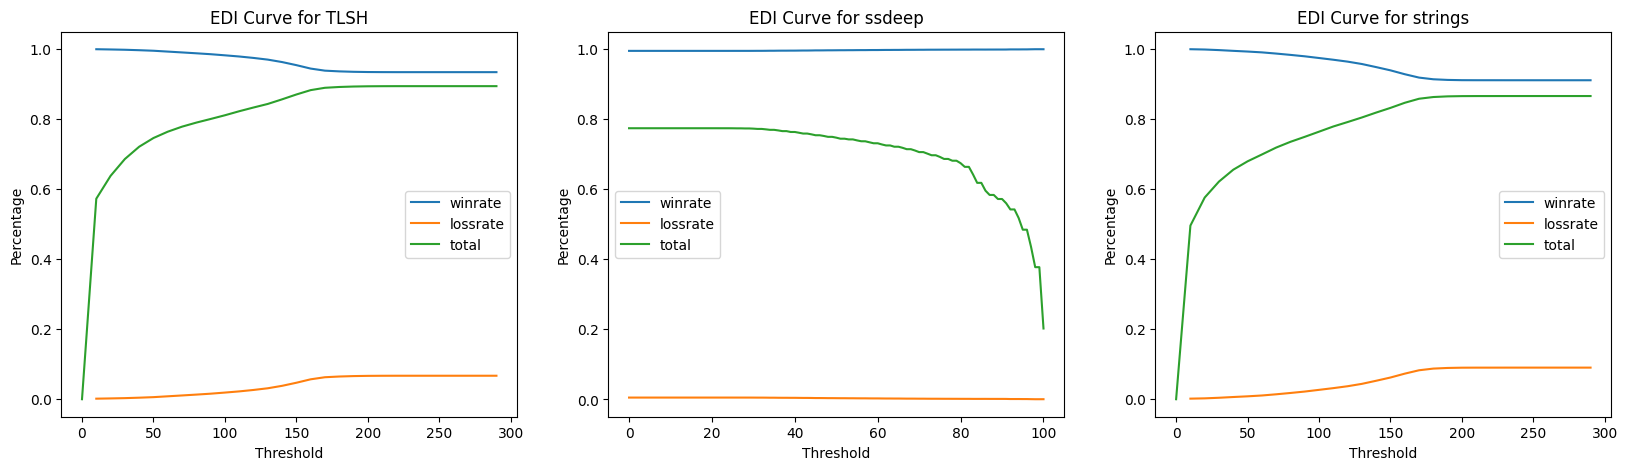

In [ ]:
titi = pd.DataFrame(tls, columns=["winrate", "lossrate", "total", "threshold"])
sisi = pd.DataFrame(ssd, columns=["winrate", "lossrate", "total", "threshold"])
stsr = pd.DataFrame(strs, columns=["winrate", "lossrate", "total", "threshold"])

plt.clf()
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].plot(titi["threshold"], titi["winrate"], label="winrate")
ax[0].plot(titi["threshold"], titi["lossrate"], label="lossrate")
ax[0].plot(titi["threshold"], titi["total"], label="total")
ax[0].legend()
ax[0].set_title("EDI Curve for TLSH")
ax[0].set_xlabel("Threshold")
ax[0].set_ylabel("Percentage")
ax[1].plot(sisi["threshold"], sisi["winrate"], label="winrate")
ax[1].plot(sisi["threshold"], sisi["lossrate"], label="lossrate")
ax[1].plot(sisi["threshold"], sisi["total"], label="total")
ax[1].legend()
ax[1].set_title("EDI Curve for ssdeep")
ax[1].set_xlabel("Threshold")
ax[1].set_ylabel("Percentage")
ax[2].plot(stsr["threshold"], stsr["winrate"], label="winrate")
ax[2].plot(stsr["threshold"], stsr["lossrate"], label="lossrate")
ax[2].plot(stsr["threshold"], stsr["total"], label="total")
ax[2].legend()
ax[2].set_title("EDI Curve for strings")
ax[2].set_xlabel("Threshold")
ax[2].set_ylabel("Percentage")
plt.show()

In [ ]:
a = df
a = a[a['tlsh'] != 'TNULL']
a.dropna(subset=['tlsh'], inplace=True)
a.dropna(subset=['ssdeep'], inplace=True)
a.dropna(subset=['strings'], inplace=True)
a['tlsh'] = a['tlsh'].apply(lambda x: x['hash_time'] if 'hash_time' in x and isinstance(x, dict) else x)
a = a[a['tlsh'] != 'TNULL']
a['ssdeep'] = a['ssdeep'].apply(lambda x: x['hash_time'] if 'hash_time' in x and isinstance(x, dict) else x)

a['strings'] = a['strings'].apply(lambda x: x['hash_time'] if 'hash_time' in x and isinstance(x, dict) else x)
a = a[a['strings'] != 'TNULL']
time_df = a

In [ ]:
time_df.sort_values(by='file_size', ascending=False)

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke
99581,65639e973624482ac9d31ce0,Vidar,f1e8f4fba1da25cc02d0673f8cc3962c7419d769cb139f...,761452376,4.002056,sdhash hash,3.060648,Machoc hash,1.314515,NaN
101823,6563a1f43624482ac9d325a2,WpBruteBot,37b086d348a2d02cd9d350c1511ee64df71f196ac732e8...,671976088,2.658913,sdhash hash,2.630134,Machoc hash,3.269084,NaN
1974,656379d13624482ac9d19f99,Bankshot,aa42069a01ee859c0ded7d6782a35d686f69530887b693...,660818559,2.606071,sdhash hash,2.614026,Machoc hash,8.189435,NaN
21621,656380193624482ac9d1ec58,Bazarbackdoor,4234abcbfb6d3db00523196def94143b8f5baa75026266...,653695192,2.652530,sdhash hash,2.676548,Machoc hash,4.167641,NaN
27359,656384b63624482ac9d202c2,Bazarbackdoor,f62d7b2ec86bf1417da84685ea27294efc56f60d072011...,645556253,2.699145,sdhash hash,2.529622,Machoc hash,3.273366,NaN
...,...,...,...,...,...,...,...,...,...,...
32059,6563872d3624482ac9d2151e,EvilPlayout,8b74c08c33cd8a0cc1eaf822caeaad6b54bc39e4839e57...,8,0.000007,sdhash hash,0.000002,Machoc hash,0.049660,NaN
103450,6563a2bb3624482ac9d32bfd,Zeus,b5bb9d8014a0f9b1d61e21e796d78dccdf1352f23cd328...,4,0.000085,sdhash hash,0.000014,Machoc hash,0.016268,NaN
20119,65637e853624482ac9d1e67a,Bazarbackdoor,13671077b66a29874a2578b5240319092ef2a1043228e4...,3,0.000167,sdhash hash,0.000021,Machoc hash,0.131402,NaN
23623,656381f73624482ac9d1f42a,Bazarbackdoor,8241649609f88ccd2a0a5b233a07a538ec313ff6adf695...,2,0.000094,sdhash hash,0.000020,Machoc hash,0.062852,NaN


In [ ]:
# map median time to family and percentage of hit rate
def time_median(df):
    tlsh_time = []
    ssdeep_time = []
    string_time = []
    for family in df['Family 1'].unique():

        values = time_df[time_df['family'] == family]['tlsh'].tolist()
        median = np.median(values) if values else np.nan
        amount = len(values)
        tmp = df[df['Family 1'] == family]
        percentage = (tmp["Family 1"] == tmp["Family 2"]).sum() / len(df) * 100
        tlsh_time.append({
            'family': family,
            'values': values,
            'median_time': median,
            'median_size': time_df[time_df['family'] == family]["file_size"].median(),
            'amount': amount,
            'percentage': percentage
        })
        
    return pd.DataFrame(tlsh_time)

tlsh_median = time_median(tlsh_best)

tlsh_median.dropna(subset=['median_time'], inplace=True)

In [ ]:

# drop all entries where amount is less than 2
tlsh_median = tlsh_median[tlsh_median['amount'] > 1]

In [ ]:
# Convert the column to float
tlsh_median["median_size"] = tlsh_median["median_size"].astype(float)

# Now call describe
tlsh_median["median_size"].describe().to_frame()

,median_size
count,4.100000e+02
mean,1.717928e+06
std,5.736637e+06
min,2.740000e+02
25%,1.084480e+05
50%,3.138218e+05
75%,1.099402e+06
max,7.953390e+07


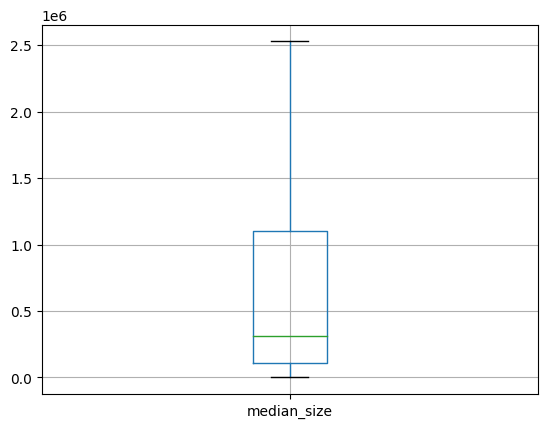

In [ ]:
tlsh_median[["median_size"]].boxplot(showfliers=False)

# save tlsh_median[["median_size"]] to csv
tlsh_median[["median_size"]].to_csv("tlsh_median_size.csv")

In [ ]:




# Convert the series to a dataframe and transpose
description = tlsh_median["median_size"].astype(float).describe().to_frame().T

# Display the dataframe
description

,count,mean,std,min,25%,50%,75%,max
median_size,410.0,1.717928e+06,5.736637e+06,274.0,108448.0,313821.75,1099402.0,79533896.0


In [ ]:
from scipy.stats import pearsonr
pearsonr(tlsh_median['median_size'], tlsh_median['percentage'])

PearsonRResult(statistic=-0.026492643462234983, pvalue=0.5927250484755359)

In [ ]:
tlsh_median.sort_values(by='median_size', ascending=False)

,family,values,median_time,median_size,amount,percentage
118,DiscordTokenStealers,"[0.3122289180755615, 0.33830809593200684, 0.13...",0.310031,79533896.0,61,0.056838
203,Android.ItauSinc,"[0.0302886962890625, 0.4142799377441406]",0.222284,55846136.0,2,0.000000
106,Bankshot,"[0.006822109222412109, 0.18759489059448242, 0....",0.127994,31964377.0,549,0.529435
29,CapraRAT,"[0.11739873886108398, 0.11801290512084961]",0.117706,29971903.5,2,0.002105
378,ROMCOMRat,"[0.00939798355102539, 0.18100476264953613]",0.095201,23234816.0,2,0.000000
...,...,...,...,...,...,...
191,BlackholeEK,"[3.1948089599609375e-05, 1.2636184692382812e-0...",0.000138,3504.0,67,0.057890
749,SundownEK,"[4.506111145019531e-05, 7.605552673339844e-05,...",0.000049,2757.0,5,0.001053
335,MacOS.Cookieminer,"[1.4781951904296875e-05, 1.7881393432617188e-0...",0.000048,1553.5,4,0.002105
447,Shikitega,"[2.4080276489257812e-05, 1.7881393432617188e-0...",0.000034,431.0,19,0.011578


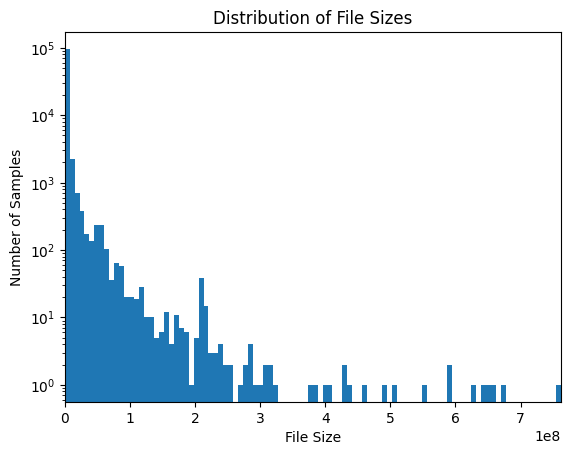

In [ ]:
time_df["file_size"].plot(kind='hist', bins=100,logy=True)
plt.xlabel("File Size")
plt.ylabel("Number of Samples")
plt.title("Distribution of File Sizes")
plt.xlim([0, max(time_df["file_size"])])

plt.show()